In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
traindf = pd.read_csv("asus laptop.csv")
traindf.head()

,Seller Name,Price,Website,Ratings,Delivery Days,Shipping Charge,Score
0,AAAEnterprise,69990,www.flipkart.com,3.5,4,1,12.501786
1,Samrat,72790,www.flipkart.com,3.7,6,1,8.471860
2,RetailNet,107990,www.flipkart.com,4.5,5,1,8.334105
3,The Lapstore,85450,www.flipkart.com,3.5,5,1,8.191925
4,Sunstar_Surat,70700,www.amazon.in,4.0,7,1,8.082441


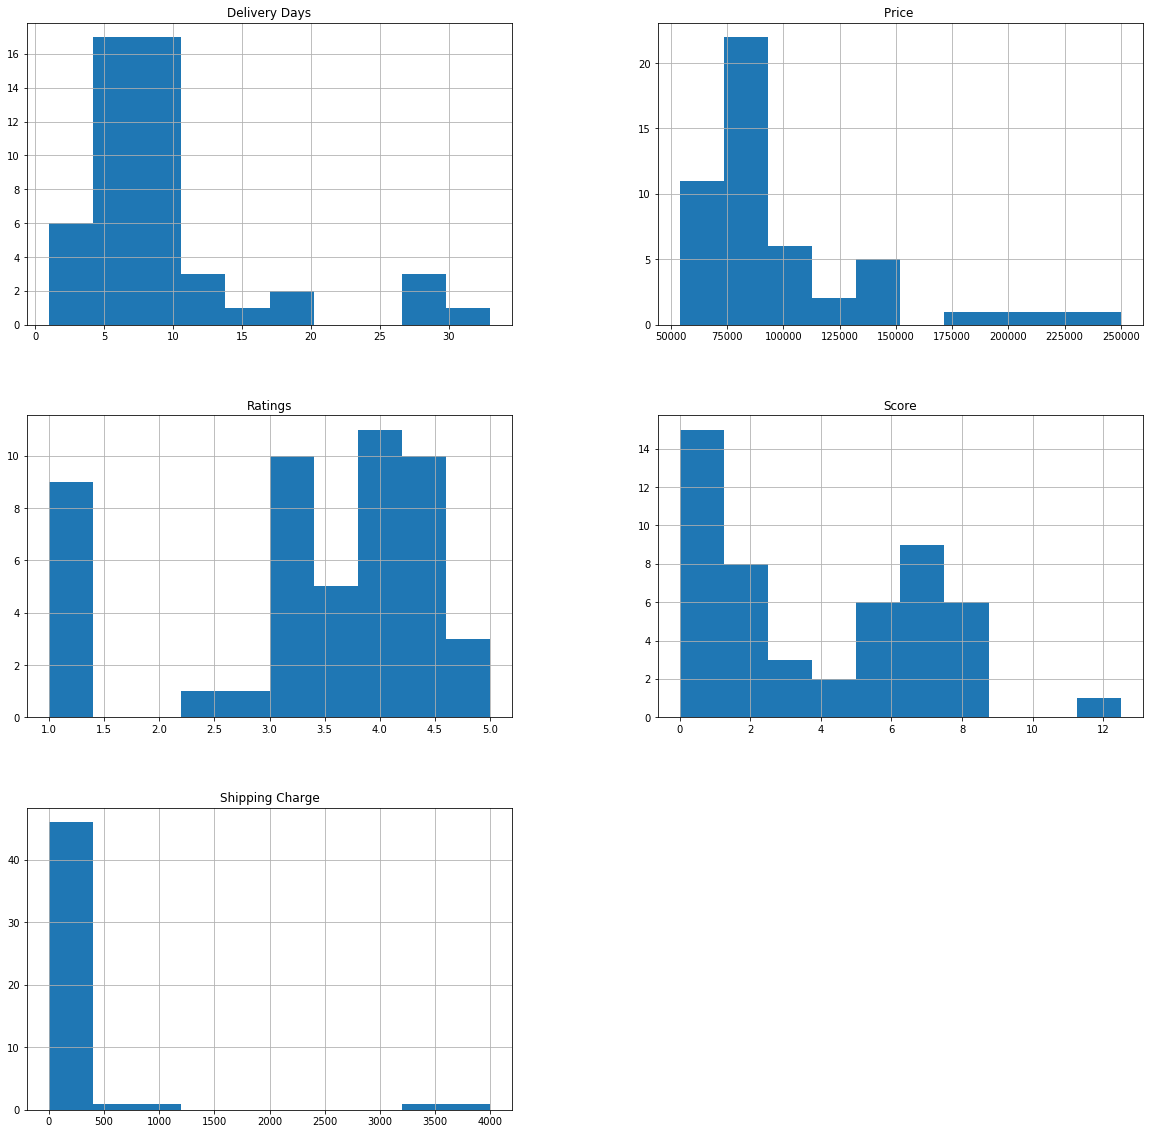

In [25]:

new_data = traindf.copy()
new_data.drop(['Website'], axis=1, inplace = True)
new_data.drop(['Seller Name'], axis=1, inplace = True)



new_data.hist(figsize=(20,20))


plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


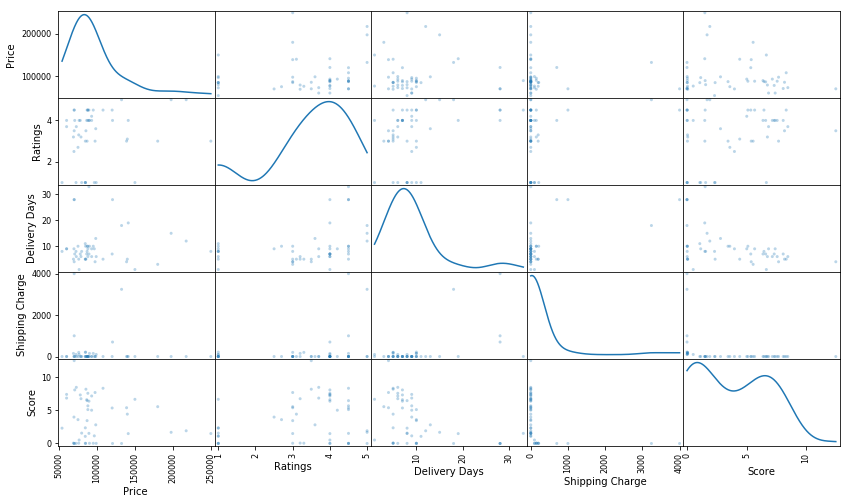

In [26]:
pd.scatter_matrix(traindf, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [27]:

ftcol = new_data.columns.difference(['Score'])
new_data[ftcol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Delivery Days      50 non-null int64
Price              50 non-null int64
Ratings            50 non-null float64
Shipping Charge    50 non-null int64
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [28]:
new_data['Score'] = new_data['Score'].astype('category')

## __Train Test Split__

In [29]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(new_data,test_size=0.3,random_state=42)
len(train)

35

In [30]:
features = train[ftcol].values
label = train['Score'].values

## __Decision Tree Regressor__

In [40]:
from sklearn.tree import DecisionTreeRegressor
Model2 = DecisionTreeRegressor(random_state=0) 
pred=Model2.fit(features, label)
pred = pred.predict(test[ftcol].values)


In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test['Score'].values, pred)

4.156632960967857

In [45]:
test['Decision Tree Score'] = pred

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
test.head(n=15)

,Price,Ratings,Delivery Days,Shipping Charge,Score,Decision Tree Score
13,86480,4.0,7,1,6.607638,6.385390
39,75990,3.3,5,200,0.043427,0.035420
30,197683,5.0,15,1,1.686201,1.915797
45,84999,1.0,10,215,0.005472,0.017052
17,179999,3.0,3,1,5.555586,1.500060
48,132401,5.0,18,3244,0.000647,0.031546
26,98388,3.6,13,1,2.814602,5.020674
25,86990,3.0,10,1,3.448672,5.114218
32,89399,4.5,33,1,1.525337,5.681883
19,119990,4.5,7,1,5.357589,6.385390


## __Gradient Boosting Regressor__

In [48]:

from sklearn import ensemble
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state': None}
clf = ensemble.GradientBoostingRegressor(**params)

pred1=clf.fit(features, label)
pred1=pred1.predict(test[ftcol].values)
test['Gradient Boost Score'] = pred1

test.head(n=15)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Price,Ratings,Delivery Days,Shipping Charge,Score,Decision Tree Score,Gradient Boost Score
13,86480,4.0,7,1,6.607638,6.385390,6.837647
39,75990,3.3,5,200,0.043427,0.035420,0.088545
30,197683,5.0,15,1,1.686201,1.915797,1.912903
45,84999,1.0,10,215,0.005472,0.017052,0.015019
17,179999,3.0,3,1,5.555586,1.500060,4.690405
48,132401,5.0,18,3244,0.000647,0.031546,0.039830
26,98388,3.6,13,1,2.814602,5.020674,3.664752
25,86990,3.0,10,1,3.448672,5.114218,3.181973
32,89399,4.5,33,1,1.525337,5.681883,4.368951
19,119990,4.5,7,1,5.357589,6.385390,6.128359


In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test['Score'].values, pred1)

1.827484043606553

## __ADA Boost Regressor__

In [51]:
from sklearn.ensemble import AdaBoostRegressor
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)
pred2=regr_2.fit(features, label)
pred2= regr_2.predict(test[ftcol].values)
test['Adaboost Score'] = pred2

test.head(n=15)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Price,Ratings,Delivery Days,Shipping Charge,Score,Decision Tree Score,Gradient Boost Score,Adaboost Score
13,86480,4.0,7,1,6.607638,6.385390,6.837647,6.896399
39,75990,3.3,5,200,0.043427,0.035420,0.088545,0.061836
30,197683,5.0,15,1,1.686201,1.915797,1.912903,1.915797
45,84999,1.0,10,215,0.005472,0.017052,0.015019,0.035420
17,179999,3.0,3,1,5.555586,1.500060,4.690405,5.395683
48,132401,5.0,18,3244,0.000647,0.031546,0.039830,0.031546
26,98388,3.6,13,1,2.814602,5.020674,3.664752,5.020674
25,86990,3.0,10,1,3.448672,5.114218,3.181973,3.889028
32,89399,4.5,33,1,1.525337,5.681883,4.368951,5.067446
19,119990,4.5,7,1,5.357589,6.385390,6.128359,6.993682


In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test['Score'].values, pred2)

5.676856895950545